In [9]:
from numpy import *
import matplotlib.pyplot as plt
from LRFutils import archive, log
from LRFutils.color import Color

import Pupil

---
# Config

In [10]:
# Image size (in pixels)
N = 101

# Pupil radius (in pixels)
pupil_radius = N/4

# Obstruction radius (in pixels)
obstruction_radius = N/20

# Arms
arms_count = 3

# Arms size (in pixels)
arms_size = 1

# Arms angle (in radians)
arms_angle = 0

---
# Script

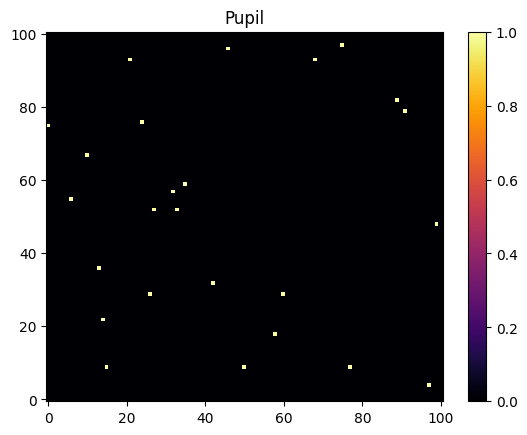

In [11]:
# Generating basic star picture

shot = zeros(N**2)
shot[0:int(N/4)] = ones(int(N/4))

random.shuffle(shot)

shot = shot.reshape((N, N))

plt.pcolor(range(N),range(N), shot, shading='auto', cmap="inferno")
plt.colorbar()
plt.title("Sky")
plt.show()

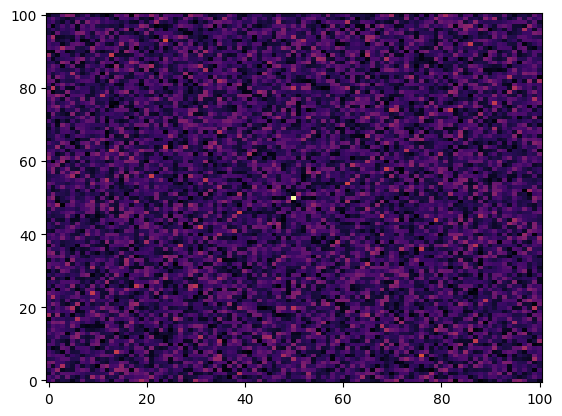

In [12]:
shot_freq = roll(fft.fft2(shot),(int(N/2),int(N/2)),(0,1))
plt.pcolor(range(N),range(N),abs(shot_freq), shading='auto', cmap="inferno")
plt.colorbar()
plt.title("Sky (frequency space)")
plt.show()

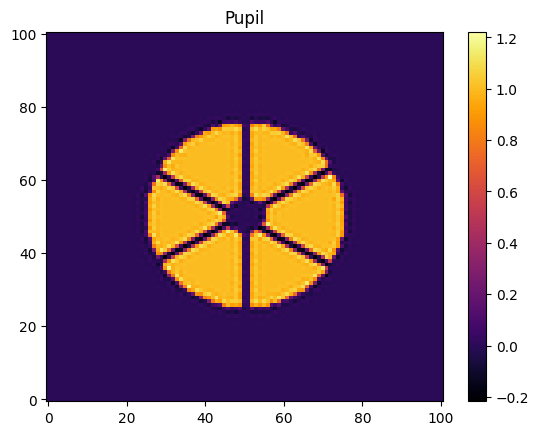

In [13]:
pupil = Pupil.create(N, pupil_radius, obstruction_radius, arms_count, arms_size, arms_angle)

plt.pcolor(range(N),range(N),pupil, shading='auto', cmap="inferno")
plt.colorbar()
plt.title("Pupil")
plt.show()

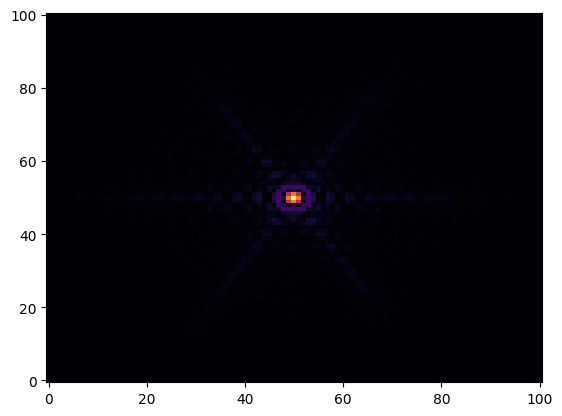

In [14]:
plt.pcolor(range(N),range(N),abs(roll(fft.fft2(pupil),(int(N/2),int(N/2)),(0,1))), shading='auto', cmap="inferno")
plt.colorbar()
plt.title("Pupil (frequency space)")
plt.show()

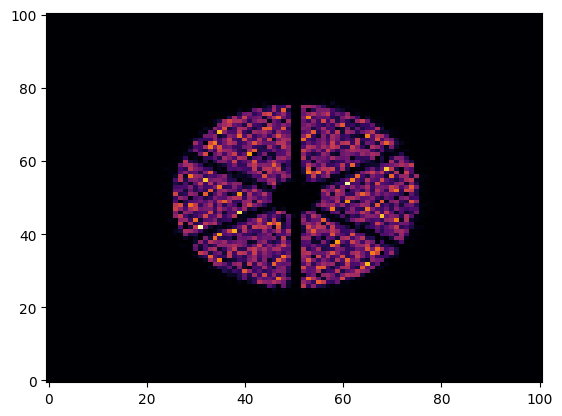

In [16]:
observation = shot_freq * pupil

plt.pcolor(range(N),range(N),abs(observation), shading='auto', cmap="inferno")
plt.colorbar()
plt.title("Observation (frequency space)")
plt.show()

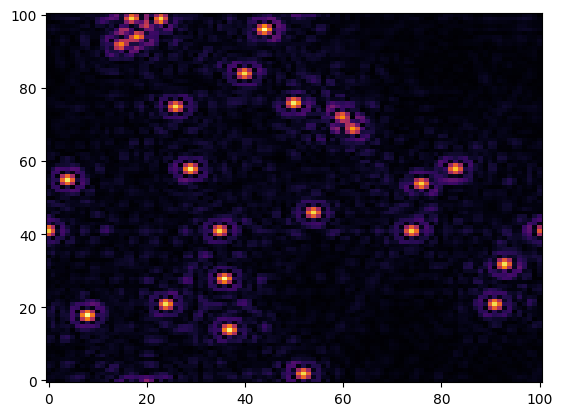

In [18]:
observation_freq = roll(fft.fft2(observation),(int(N/2),int(N/2)),(0,1))

plt.pcolor(range(N),range(N),abs(observation_freq), shading='auto', cmap="inferno")
plt.colorbar()
plt.title("Observation")
plt.show()